*Creado por:*

*Isabel Maniega*

### 1.4.1 – Comprender los formatos de archivo en la adquisición de datos

1. **CSV (valores separados por comas)**
Atributos clave

Los archivos CSV almacenan datos tabulares en formato de texto sin formato con la extensión .csv. Un archivo típico contiene valores separados por comas, pero también se permiten otros separadores como punto y coma o tabulación. Se debe enfatizar que solo se puede usar un tipo de separador en un archivo CSV.

Es simple y se usa ampliamente por su compatibilidad con muchas aplicaciones.
Carece de soporte para tipos de datos y puede ser ineficiente para grandes conjuntos de datos.
Los archivos CSV se usan comúnmente para intercambiar datos tabulares entre diferentes sistemas o aplicaciones. Son populares en escenarios donde la interoperabilidad y la simplicidad son más importantes que las funciones avanzadas.

Los archivos CSV son fácilmente legibles tanto por humanos como por máquinas. Se usan para tareas como importar y exportar datos desde bases de datos, hojas de cálculo y herramientas de análisis. Sin embargo, es posible que no sean la mejor opción para grandes conjuntos de datos debido a su falta de información sobre el tipo de datos y a su almacenamiento ineficiente.

El formato **CSV** (valores separados por comas) es uno de los formatos de archivo más populares que se utilizan para almacenar y transferir datos entre diferentes programas. Actualmente, muchas herramientas de gestión de bases de datos y el popular Excel ofrecen la importación y exportación de datos en este formato.

Cada línea del archivo representa un determinado conjunto de datos. Opcionalmente, en la primera línea podemos poner un encabezado que describa estos datos. Veamos un ejemplo sencillo de un archivo llamado ```contacts.csv``` que almacena los contactos de un teléfono:
```
Name,Phone
mother,222-555-101
father,222-555-102
wife,222-555-103
mother-in-law,222-555-104
```

En el archivo anterior, hay cuatro contactos que consisten en ```nombre``` y ```número de teléfono```. Tenga en cuenta que la primera línea contiene un encabezado para ayudarlo a interpretar los datos.

**Lectura de datos de un archivo CSV (parte 1)**

La biblioteca estándar de Python ofrece un módulo llamado ```csv``` que proporciona funciones para leer y escribir datos en formato CSV. La lectura de datos se realiza utilizando el objeto ```reader```, mientras que la escritura se realiza utilizando el objeto ```writer```. Primero, analizaremos más de cerca la lectura de datos utilizando el objeto ```reader```.

La función ```reader``` devuelve un objeto que le permite iterar sobre cada línea en el archivo CSV. Para crearlo, necesitamos pasar un objeto de archivo a la función ```reader```. Para este propósito, podemos utilizar una función incorporada llamada open. Mire el código en el editor y ejecútelo.

Debería producir el siguiente resultado:
```
['Name', 'Phone']
['mother', '222-555-101']
['father', '222-555-102']
['wife', '222-555-103']
['mother-in-law', '222-555-104']
```
¿Qué sucedió? Hemos pasado un archivo abierto llamado ```contacts.csv``` y un separador utilizado para separar los datos del archivo a la función de lectura. El segundo argumento se puede omitir si nuestro archivo utiliza el separador predeterminado, que es una coma; lo hemos agregado para mostrarle cómo especificar otros separadores.

In [1]:
import csv

with open('contacts.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        print(row)

['Name', 'Phone']
['mother', '222-555-101']
['father', '222-555-102']
['wife', '222-555-103']
['mother-in-law', '222-555-104']


**Lectura de datos de un archivo CSV (parte 2)**

Por último, leemos cada fila mediante el bucle for. Observe que se devuelve una sola línea como una lista de cadenas. Sin embargo, se pueden obtener resultados más legibles, por ejemplo, mediante el método join. Observe el código en el editor y ejecútelo.

Debería producir el siguiente resultado:
```
Name,Phone
mother,222-555-101
father,222-555-102
wife,222-555-103
mother-in-law,222-555-104
```
NOTA: El argumento ```newline=''``` agregado a la función ```open``` nos protege de la interpretación incorrecta del carácter de nueva línea en diferentes plataformas.

In [2]:
import csv

with open('contacts.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        print(','.join(row))

Name,Phone
mother,222-555-101
father,222-555-102
wife,222-555-103
mother-in-law,222-555-104


**Lectura de datos de un archivo CSV (parte 3)**

El módulo ```csv``` proporciona una forma más cómoda de leer datos, en la que cada línea se asigna a un objeto ```OrderedDict```. Para lograr esto, debemos utilizar la clase ```DictReader``` de la forma que mostramos en el editor.

El código en el editor producirá la siguiente salida:
```
mother : 222-555-101
father : 222-555-102
wife : 222-555-103
mother-in-law : 222-555-104
```

In [3]:
import csv

with open('contacts.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['Name'], ':', row['Phone'])

mother : 222-555-101
father : 222-555-102
wife : 222-555-103
mother-in-law : 222-555-104


**Lectura de datos de un archivo CSV (parte 4)**

Al igual que la función de lectura, la clase ```DictReader``` acepta un objeto ```file``` como argumento. Trata la primera línea del archivo como un encabezado desde el cual leer las claves. Si su archivo no tiene un encabezado, debe definirlo utilizando el argumento ```fieldnames```. Mire el código en el editor.

NOTA: Si define más nombres de columnas que valores en el archivo, los valores faltantes serán ```None```.

In [4]:
import csv

with open('contacts.csv', newline='') as csvfile:
    fieldnames = ['Name', 'Phone']
    reader = csv.DictReader(csvfile, fieldnames=fieldnames)
    for row in reader:
        print(row['Name'], row['Phone'])

Name Phone
mother 222-555-101
father 222-555-102
wife 222-555-103
mother-in-law 222-555-104


**Guardar datos en un archivo CSV (parte 1)**

Como mencionamos antes, guardar datos en un archivo CSV se hace usando el objeto ```writer``` provisto por el módulo ```csv```. Para crearlo, necesitamos usar una función llamada ```writer```, que toma el mismo conjunto de argumentos que la función reader. Veamos cómo guardar contactos en un archivo CSV. Observa el código en el editor.

En el código de ejemplo, primero abrimos el archivo para escribir. El modo ```'w'``` crea un archivo para nosotros si aún no se ha creado. A continuación, creamos un objeto ```writer``` que usamos para agregar filas usando el método ```writerow```. El método ```writerow``` toma una lista de valores como argumento y luego los guarda como una línea en un archivo CSV.

In [5]:
import csv

with open('exported_contacts.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    
    writer.writerow(['Name', 'Phone'])
    writer.writerow(['mother', '222-555-101'])
    writer.writerow(['father', '222-555-102'])
    writer.writerow(['wife', '222-555-103'])
    writer.writerow(['mother-in-law', '222-555-104'])

**Guardar datos en un archivo CSV (parte 2)**

Imagina una situación en la que agregas un contacto que contiene el separador utilizado para separar los valores en el archivo CSV. De manera predeterminada, estos valores están entre comillas, pero puedes cambiar esto con el argumento ```quotechar```, que debe ser un solo carácter. Observa el código en el editor y observa cómo configuramos explícitamente los argumentos predeterminados.

El código guardará los siguientes datos en el archivo exported_contacts.csv:
```
Name,Phone
mother,222-555-101
father,222-555-102
wife,222-555-103
"grandmother, grandfather and auntie",222-555-105
```
El último argumento, llamado ```quoting```, especifica qué valores deben ```quotarse```. El valor predeterminado ```QUOTE_MINIMAL``` significa que solo se compondrán valores con caracteres especiales como separador o ```quotechar```. En nuestro caso, es el valor de ```"abuela, abuelo y tía"```.

A continuación, se muestran otras constantes que podemos usar como valor del argumento ```quoting```:

- **csv.QUOTE_ALL**: comprime todos los valores

- **csv.QUOTE_NONNUMERIC**: comprime solo valores no numéricos

- **csv.QUOTE_NONE**: no comprime ningún valor. No es una buena idea establecer este valor si tiene caracteres especiales que requieren comillas, ya que esto generará un error.

NOTA: Los parámetros ```quotechar``` y ```quoting``` también se pueden usar en la función ```reader```. Consulte la documentación para obtener más información.

In [6]:
import csv

with open('exported_contacts.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['Name', 'Phone'])
    writer.writerow(['mother', '222-555-101'])
    writer.writerow(['father', '222-555-102'])
    writer.writerow(['wife', '222-555-103'])
    writer.writerow(['mother-in-law', '222-555-104'])
    writer.writerow(['grandmother, grandfather', '222-555-105'])

**Guardar datos en un archivo CSV (parte 3)**

¿Recuerdas cómo leíamos las filas del archivo CSV en objetos ```OrderedDict```? En el módulo ```csv```, hay una clase análoga llamada ```DictWriter``` con la que podemos mapear diccionarios a filas. A diferencia del objeto ```DictReader```, al crear el objeto ```DictWriter```, debemos definir un encabezado. Veamos el ejemplo en el editor.

Para crear el objeto ```DictWriter```, usamos un objeto de archivo y una lista que contiene los nombres de las columnas. Ten en cuenta que antes de guardar el valor, primero llamamos al método ```writeheader```, que agrega el encabezado a la primera línea del archivo. Después de eso, agregamos filas con valores pasando diccionarios al método ```writerow```.

In [7]:
import csv

with open('exported_contacts.csv', 'w', newline='') as csvfile:
    fieldnames = ['Name', 'Phone']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    writer.writerow({'Name': 'mother', 'Phone': '222-555-101'})
    writer.writerow({'Name': 'father', 'Phone': '222-555-102'})
    writer.writerow({'Name': 'wife', 'Phone': '222-555-103'})
    writer.writerow({'Name': 'mother-in-law', 'Phone': '222-555-104'})
    writer.writerow({'Name': 'grandmother, grandfather and auntie', 'Phone': '222-555-105'})

2. **JSON (notación de objetos JavaScript)**

- **J**ava...
- ...**S**cript
- **O**bject
- **N**otation

Atributos clave

JSON es un formato de intercambio de datos liviano, legible para humanos y fácil de entender tanto para humanos como para máquinas.
Se usa ampliamente para representar datos estructurados, particularmente en aplicaciones web y API.
JSON admite estructuras anidadas y se usa a menudo para datos semiestructurados.
JSON se usa a menudo en desarrollo web, API y configuraciones donde los datos deben almacenarse o transmitirse en un formato estructurado. Es especialmente útil cuando se trabaja con datos semiestructurados.

Los archivos JSON almacenan datos como pares clave-valor en una estructura jerárquica. Se usan para tareas como almacenar configuraciones de aplicaciones, intercambiar datos entre servicios web y serializar estructuras de datos complejas en lenguajes de programación.
```
{
  "name": "Nnamdi Samuel",
  "age": 30,
  "email": "Nnamdi@example.com",
  "address": {
    "street": "123 Main St",
    "city": "Anytown",
    "state": "CA",
    "zipcode": "12345"
  },
  "phone_numbers": [
    {
      "type": "home",
      "number": "555-1234"
    },
    {
      "type": "work",
      "number": "555-5678"
    }
  ]
}
```
¿Cómo podemos cumplir con este requisito?

El problema con el que debemos luchar es cómo representar un objeto (entendido como un conjunto de datos de diferentes tipos, incluidos otros objetos) o incluso un único valor de una manera que pueda sobrevivir a las transferencias de red y las conversiones entre plataformas.

JSON resuelve el problema utilizando dos trucos simples:

- utiliza texto codificado en UTF-8, lo que significa que no se utilizan formatos dependientes de la máquina o la plataforma; también significa que los datos que lleva JSON son legibles (mal, pero siempre legibles) y comprensibles para los humanos;
- utiliza un formato simple y no muy expandido (podemos llamarlo sintaxis, o incluso gramática) para representar dependencias mutuas y relaciones entre diferentes partes de los objetos, y es capaz de transferir no solo los valores de las propiedades de los objetos, sino también sus nombres.

En JSON, puede ser un valor sin nombre como un número, una cadena, un booleano o… nada, aunque esto no es lo que más nos gusta de JSON. JSON puede transportar datos mucho más complejos, recopilados y agregados en conjuntos más grandes.

Si desea transferir no solo datos sin procesar sino también todos los nombres vinculados a ellos (como la forma en que los objetos mantienen sus propiedades), JSON ofrece una sintaxis que parece un pariente cercano del diccionario de Python, que es, de hecho, un conjunto de pares ```clave:valor```. Hacer tal suposición nos lleva a la siguiente pregunta: ¿podemos usar la sintaxis de Python para codificar y decodificar mensajes de red en REST?

Sí, podemos, pero no será JSON. Si desea que sus datos sean ampliamente comprendidos (no solo por sus contrapartes de Python), debe usar JSON.

**Trabajar con el módulo JSON en Python**

Ahora que estamos familiarizados con los aspectos esenciales de JSON, es hora de aprender a usarlo con Python. Nos preocupa un poco que pienses que queremos que construyas laboriosamente mensajes JSON, preocupándote por todos esos corchetes, paréntesis y dos puntos, y que descompongas líneas JSON complejas en factores primos. ¡Nada más lejos de la realidad! No tenemos la costumbre de pensar en ideas tan locas, aunque, para ser honestos, no es tan complejo como parece y estamos convencidos de que serías capaz de afrontar semejante desafío. Afortunadamente, no es necesario.

¿Por qué?

Porque hay un módulo de Python, llamado JSON, que puede realizar todas esas tareas pesadas por ti.

¿Cómo comenzamos una nueva aventura? Es obvio, y estamos seguros de que lo sabías antes de que te lo preguntáramos:
```
import json
```

La primera característica del módulo JSON es su capacidad de convertir automáticamente datos de Python (no todos y no siempre) en una cadena JSON. Si desea realizar dicha operación, puede utilizar una función llamada ```dumps()```.

Nota: el 's al final del nombre de la función significa cadena. Existe una función muy similar con el nombre privado de este sufijo que escribe la cadena JSON en el archivo para transmisiones similares a archivos.

La función hace lo que promete: toma datos (incluso datos algo complicados) y produce una cadena llena con un mensaje JSON. Por supuesto, ```dumps()``` no es un profeta y no puede leer su mente, así que no espere milagros.

Comencemos con algunos fragmentos simples.

El primero de nuestros ejemplos toma un número y genera un número; no esperamos nada más:
```
import json

electron = 1.602176620898E10−19
print(json.dumps(electron))
```

El código genera:
```
16021766189.98
```
Nota: la notación es diferente, pero el valor sigue siendo el mismo. Compruébelo usted mismo.

Hagamos lo mismo, pero con una cadena, de esta manera:
```
import json

comics = '"The Meaning of Life" by Monty Python\'s Flying Circus'
print(json.dumps(comics))
```

El código genera:
```
"\"The Meaning of Life\" by Monty Python's Flying Circus"
```
Como puedes ver, se cumplieron todos los requisitos de JSON.

Ahora es un buen momento para presentar una lista. ¿Qué te parece este ejemplo?
```
import json

my_list = [1, 2.34, True, "False", None, ['a', 0]]
print(json.dumps(my_list))
```

Como puedes ver, en realidad hay dos listas. ¿Es eso un problema? ¡En absoluto!

El código imprime:
```
[1, 2.34, True, "False", null, ["a", 0]]
```

Queremos hacerte una pregunta: ¿qué sucederá si usamos una tupla en lugar de una lista? La respuesta es predecible: nada. Como JSON no puede distinguir entre listas y tuplas, ambas se convierten en matrices JSON.

Revisemos un diccionario. Aquí hay una prueba sencilla:
```
import json

my_dict = {'me': "Python", 'pi': 3.141592653589, 'data': (1, 2, 4, 8), 'set': None}
print(json.dumps(my_dict))
```

Y esta es la salida del código:
```
{"me": "Python", "pi": 3.141592653589, "data": [1, 2, 4, 8], "friend": "JSON", "set": null}
```
Ahora estamos listos para sacar algunas conclusiones.

Como puedes ver, Python usa un pequeño conjunto de reglas simples para crear mensajes JSON a partir de sus datos nativos. Aquí está:

|    Python data     |    JSON element    |
| -------------------| -------------------|
|      ```dict```    | ```object```       |
|```list or tuple``` | ```array```        |
|     ```string```   | ```string```       |
| ```int or float``` | ```number```       |
| ```True / False``` | ```true / false``` |
|     ```None```     | ```null```         |

Parece simple y coherente, pero ¿dónde está la trampa?

La trampa está aquí:
```
import json

class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


some_man = Who('John Doe', 42)
print(json.dumps(some_man))
```

El resultado que verás es extremadamente decepcionante:
```
TypeError: Object of type 'Class' is not JSON serializable
```

Sí, esa es la clave. No puedes simplemente volcar el contenido de un objeto, incluso un objeto tan simple como este.

Por supuesto, si no necesitas nada más que un conjunto de propiedades de objeto y sus valores, puedes realizar un truco (un poco sucio) y volcar no el objeto en sí, sino el contenido de su propiedad ```__dict__```. Funcionará, pero esperamos más.

¿Qué deberíamos hacer?

Hay al menos dos opciones que podemos utilizar. La primera de ellas se basa en el hecho de que podemos sustituir la función que ```dumps()``` usa para obtener una representación textual de su argumento. Hay dos pasos a seguir:

- escribir tu propia función sabiendo cómo manejar tus objetos;
- hacer que ```dumps()``` lo sepa estableciendo el argumento de palabra clave llamado default;

Ahora mira el código en la ventana del editor. El ejemplo muestra una implementación simple de la idea.

El código imprime:
```
{"name": "John Doe", "age": 42}
```

Nota: decidimos usar el diccionario como destino del mensaje JSON. Gracias a eso, guardaremos los nombres de las propiedades junto con sus valores. Esto hará que JSON sea más fácil de leer y más comprensible para los humanos.

Nota: generar una excepción ```TypeError``` es obligatorio; esta es la única forma de informar a ```dumps()``` que su función no puede convertir objetos que no sean los derivados de la clase Who.

Nota: el proceso en el que un objeto (almacenado internamente por Python) se convierte en un aspecto textual o cualquier otro aspecto portátil a menudo se denomina serialización. De manera similar, la acción inversa (de portátil a interno) se denomina deserialización.

Como puede ver, hemos convertido (serializado) nuestro objeto en un diccionario; ```dumps()``` lo convertirá en un objeto JSON.

In [8]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


def encode_who(w):
    if isinstance(w, Who):
        return w.__dict__
    else:
        raise TypeError(w.__class__.__name__ + ' is not JSON serializable')


some_man = Who('John Doe', 42)
print(json.dumps(some_man, default=encode_who))

{"name": "John Doe", "age": 42}


El segundo enfoque se basa en el hecho de que la serialización se realiza mediante el método denominado ```default()```, que forma parte de la clase ```json.JSONEncoder```. Esto te da la oportunidad de sobrecargar el método que define una subclase de JSONEncoder y pasarlo a ```dumps()``` utilizando el argumento de palabra clave denominado ```cls```, tal como en el código que hemos proporcionado en el editor.

Como puedes ver, estamos liberados de la obligación de generar excepciones. Genial, ¿no?

El código produce el mismo resultado que el anterior:
```
{"name": "John Doe", "age": 42}
```
Parece que sabemos lo suficiente sobre cómo viajar desde el mundo de Python al mundo de JSON, pero aún no sabemos cómo regresar. Vamos a ocuparnos de ello.

In [9]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


class MyEncoder(json.JSONEncoder):
    def default(self, w):
        if isinstance(w, Who):
            return w.__dict__
        else:
            return super().default(self, z)


some_man = Who('John Doe', 42)
print(json.dumps(some_man, cls=MyEncoder))

{"name": "John Doe", "age": 42}


La función que puede obtener una cadena JSON y convertirla en datos de Python se llama ```loads()```: toma una cadena (de ahí la s al final de su nombre) e intenta crear una entidad de Python correspondiente a los datos recibidos.

Así es como funciona:
```
import json

jstr = '16021766189.98'
electron = json.loads(jstr)
print(type(electron))
print(electron)
```

El código imprime:
```
<class 'float'>
16021766189.98
```

La función ```loads()``` también puede manejar cadenas. Observa el fragmento:
```
import json

jstr = '"\\"The Meaning of Life\\" by Monty Python\'s Flying Circus"'
comics = json.loads(jstr)
print(type(comics))
print(comics)
```

¿Puedes ver las barras invertidas dobles dentro de jstr? ¿Son realmente necesarias?

Sí, lo son, ya que tenemos que entregar una cadena JSON exacta en ```loads()```. Esto significa que la barra invertida debe preceder a todas las comillas existentes dentro de la cadena. Eliminar cualquiera de ellas hará que la cadena no sea válida y ```loads()``` no le gustará con seguridad.

El código genera lo siguiente:
```
<class 'str'>
"The Meaning of Life" by Monty Python's Flying Circus
```

¿Y qué pasa con las listas? ¿Es ```loads()``` lo suficientemente inteligente como para interpretarlas correctamente?

Sí, lo es. Eche un vistazo:
```
import json

jstr = '[1, 2.34, true, "False", null, ["a", 0]]'
my_list = json.loads(jstr)
print(type(mylist))
print(mylist)
```

El código imprime:
```
<class 'list'>
[1, 2.34, True, 'False', None, ['a', 0]]
```

Esperamos que el objeto JSON se procese correctamente.

Sí, lo hará:
```
import json

json_str = '{"me":"Python","pi":3.141592653589, "data":[1,2,4,8],"friend":"JSON","set": null}'
my_dict = json.loads(json_str)
print(type(my_dict))
print(my_dict)
```

El código imprime:
```
<class 'dict'>
{'me': 'Python', 'pi': 3.141592653589, 'data': [1, 2, 4, 8], 'friend': 'JSON', 'set': None}
```

Nuestras pruebas muestran que la tabla que presentamos antes funciona correctamente en ambas direcciones. Solo hay una diferencia específica: si un número codificado dentro de una cadena JSON no tiene ninguna parte fraccionaria, Python creará un número entero o, en caso contrario, un número flotante.

Pero, ¿qué sucede con los objetos de Python? ¿Podemos deserializarlos de la misma manera que realizamos la serialización?

Como probablemente esperes, deserializar un objeto puede requerir algunos pasos adicionales. Sí, de hecho. Como ```loads()``` no puede adivinar qué objeto (de qué clase) necesitas deserializar, debes proporcionar esta información.

Observa el fragmento que hemos proporcionado en la ventana del editor.

In [10]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


def encode_who(w):
    if isinstance(w, Who):
        return w.__dict__
    else:
        raise TypeError(w.__class__.__name__ + 'is not JSON serializable')


def decode_who(w):
    return Who(w['name'], w['age'])


old_man = Who("Jane Doe", 23)
json_str = json.dumps(old_man, default=encode_who)
new_man = json.loads(json_str, object_hook=decode_who)
print(type(new_man))
print(new_man.__dict__)

<class '__main__.Who'>
{'name': 'Jane Doe', 'age': 23}


Como puedes ver, hay un argumento de palabra clave llamado ```object_hook```, que se usa para señalar la función responsable de crear un objeto nuevo de una clase necesaria y de llenarlo con datos reales.

Nota: la función ```decode_who()``` recibe una entidad de Python, o más específicamente, un diccionario. Como el constructor de Who espera dos valores ordinarios, una cadena y un número, no un diccionario, tenemos que usar un pequeño truco: hemos empleado el operador doble ```*``` para convertir el directorio en una lista de argumentos de palabras clave construida a partir de los pares ```key:value``` del diccionario. Por supuesto, las claves del diccionario deben tener los mismos nombres que los parámetros del constructor.

Nota: la función, especificada por ```object_hook``` se invocará solo cuando la cadena JSON describa un objeto JSON. Lo sentimos, no hay excepciones a esta regla.

Como ya se ha dicho, también es posible utilizar un enfoque más puro basado en objetos, que se basa en la redefinición de la clase JSONDecoder. Lamentablemente, esta variante es más complicada que su contraparte de codificación.

No necesitamos reescribir ningún método, pero sí tenemos que redefinir el constructor de la superclase, lo que hace que nuestro trabajo sea un poco más laborioso. El nuevo constructor tiene como objetivo hacer solo una cosa: establecer una función para la creación de objetos.

Como puede ver, esto es exactamente lo mismo que hicimos antes, pero expresado en un nivel diferente.

Nos complace informarle que ahora hemos reunido suficiente conocimiento para pasar al siguiente nivel. Volveremos a tratar algunos problemas de red, pero también queremos mostrarle algunas herramientas nuevas y útiles.

In [11]:
import json


class Who:
    def __init__(self, name, age):
        self.name = name
        self.age = age


class MyEncoder(json.JSONEncoder):
    def default(self, w):
        if isinstance(w, Who):
            return w.__dict__
        else:
            return super().default(self, z)


class MyDecoder(json.JSONDecoder):
    def __init__(self):
        json.JSONDecoder.__init__(self, object_hook=self.decode_who)

    def decode_who(self, d):
        return Who(**d)


some_man = Who('Jane Doe', 23)
json_str = json.dumps(some_man, cls=MyEncoder)
new_man = json.loads(json_str, cls=MyDecoder)

print(type(new_man))
print(new_man.__dict__)

<class '__main__.Who'>
{'name': 'Jane Doe', 'age': 23}


## Resumen:

In [12]:
import json

data = {
    "presidente": {
        "nombre": "Zaphod Beeblebrox",
        "especie": "Betelgeusian"
    }
}

# dumps: Serialización objeto python a str
json_string = json.dumps(data)
json_string

'{"presidente": {"nombre": "Zaphod Beeblebrox", "especie": "Betelgeusian"}}'

In [13]:
# loads: Deserialización string a objeto

json_decoded = json.loads(json_string)
json_decoded['presidente']

{'nombre': 'Zaphod Beeblebrox', 'especie': 'Betelgeusian'}

In [14]:
# Genera un .json con los datos de la variable data:

with open('archivo_json.json', 'w') as file:
     json.dump(data, file, indent=4)

In [15]:
# Lectura del archivo .json:

with open('archivo_json.json', 'r') as file:
     print(json.load(file))

{'presidente': {'nombre': 'Zaphod Beeblebrox', 'especie': 'Betelgeusian'}}


3. **Archivo TXT**

El archivo TXT significa "Documento de archivo de texto". TXT es un formato de archivo de texto básico que almacena texto sin formato y es un formato de texto ampliamente compatible. Un archivo TXT consta de texto sin formato ni estilo complejos. Por lo tanto, son fáciles de crear y editar. Además, al evitar el estilo, sus tamaños de archivo son pequeños en comparación con otros formatos de archivo. Se desarrolló en la década de 1960. Además de almacenar información de texto básica, se utilizan para almacenar datos más complejos, como código y scripts.

**¿Dónde se utiliza TXT?**
Los archivos TXT se utilizan para una amplia variedad de usos, incluidos:

- Almacenamiento de datos simples
- Escritura de códigos y scripts
- Registros del sistema
- Archivos de configuración
- Documentos de ayuda

**Aplicaciones que utilizan archivos TXT**
Muchos programas y sistemas operativos utilizan archivos TXT para guardar registros de aplicaciones y registros del sistema. También se utilizan en muchas aplicaciones para guardar archivos de configuración y datos. Los programadores lo utilizan para guardar sus códigos y scripts.

**¿Beneficios?**
A continuación se detallan algunas ventajas de los archivos TXT sobre otros formatos de archivos de texto:

- Tamaño pequeño: se sabe que los archivos TXT tienen un tamaño de archivo pequeño en comparación con otros formatos de archivos de texto.
- Compatibilidad: TXT es un formato de archivo compatible con la mayoría de los sistemas operativos.
- Facilidad: es fácil crear y modificar un archivo TXT.
- El formato de archivo TXT es un formato de archivo simple que se utiliza para guardar datos de texto. Se puede crear y editar en todos los sistemas operativos y tiene una pequeña huella de memoria. Son inevitables en el mundo digital, ya que es un medio básico para almacenar datos digitalmente.

**Procesamiento de archivos**

stream = open('file.txt', 'rt', encoding='utf-8')

Donde el argumento de codificación debe establecerse en un valor dentro de una cadena que represente la codificación de texto adecuada (UTF-8, en este caso).

In [16]:
# Se abre el archivo tzop.txt en modo lectura, devolviéndolo como un objeto del tipo archivo:
stream = open("tzop.txt", "rt", encoding = "utf-8")

# Se imprime el contenido del archivo:
print(stream.read()) 

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [17]:
stream.close()

In [18]:
from os import strerror

try:
    counter = 0
    stream = open('text.txt', "rt")
    char = stream.read(1)
    while char != '':
        print(char, end='')
        counter += 1
        char = stream.read(1)
    stream.close()
    print("\n\nCaracteres en el archivo:", counter)
except IOError as e:
    print("Se produjo un error de E/S:", strerror(e.errno))

Hola
line
d,knsk
nvoige


Caracteres en el archivo: 24


* Se usa el mecanismo try-except y se abre el archivo con el nombre (text.txt en este caso).
* Intenta leer el primer carácter del archivo (char = stream.read(1)).
* Si tienes éxito (esto se demuestra por el resultado positivo de la condición while), se muestra el carácter (nota el argumento end=, ¡es importante! ¡No querrás saltar a una nueva línea después de cada carácter!).
* Tambien, se actualiza el contador (counter),
* Intenta leer el siguiente carácter y el proceso se repite.

Si estás absolutamente seguro de que la longitud del archivo es segura y puedes leer todo el archivo en la memoria de una vez, puedes hacerlo: la función read(), invocada sin ningún argumento o con un argumento que se evalúa a None, hará el trabajo por ti.

Recuerda: el leer un archivo muy grande (en terabytes) usando este método puede dañar tu sistema operativo.

No esperes milagros: la memoria de la computadora no se puede extender.

In [19]:
from os import strerror

try:
    counter = 0
    stream = open('text.txt', "rt")
    content = stream.read()
    for char in content:
        print(char, end='')
        counter += 1
    stream.close()
    print("\n\nCaracteres en el archivo:", counter)
except IOError as e:
    print("Se produjo un error de E/S:", strerror(e.errno))

Hola
line
d,knsk
nvoige


Caracteres en el archivo: 24


* Abre el archivo, como anteriormente se hizo.
* Lee el contenido mediante una invocación de la función read().
* Después, se procesa el texto, iterando con un bucle for su contenido, y se actualiza el valor del contador en cada vuelta del bucle.

El resultado será exactamente el mismo que en el ejemplo anterior.

**readline()**

Si deseas manejar el contenido del archivo como un conjunto de líneas, no como un montón de caracteres, el método readline() te ayudará con eso.

El método intenta leer una **línea completa** de texto del archivo, y la devuelve como una cadena en caso de éxito. De lo contrario, devuelve una **cadena vacía.**

Esto abre nuevas oportunidades: ahora también puedes contar líneas fácilmente, no solo caracteres.

In [20]:
from os import strerror

try:
    character_counter = line_counter = 0
    stream = open('text.txt', 'rt')
    line = stream.readline()
    while line != '':
        line_counter += 1
        for char in line:
            print(char, end='')
            character_counter += 1
        line = stream.readline()
    stream.close()
    print("\n\nCaracteres en el archivo:", character_counter)
    print("Líneas en el archivo:     ", line_counter)
except IOError as e:
    print("Se produjo un error de E/S:", strerror(e.errno))

Hola
line
d,knsk
nvoige


Caracteres en el archivo: 24
Líneas en el archivo:      4


**readlines()**

Cuando el método readlines(), se invoca sin argumentos, intenta leer todo el contenido del archivo y devuelve una lista de cadenas, un elemento por línea del archivo.

Si no estás seguro de si el tamaño del archivo es lo suficientemente pequeño y no deseas probar el sistema operativo, puedes convencer al método readlines() de leer no más de un número especificado de bytes a la vez (el valor de retorno sigue siendo el mismo, es una lista de una cadena).

Siéntete libre de experimentar con el siguiente código de ejemplo para entender cómo funciona el método readlines():

In [21]:
stream = open("text.txt")
print(stream.readlines(20))
print(stream.readlines(20))
print(stream.readlines(20))
print(stream.readlines(20))
stream.close()

['Hola\n', 'line\n', 'd,knsk\n', 'nvoige\n']
[]
[]
[]


Hemos decidido usar un búfer de 15 bytes de longitud. No pienses que es una recomendación.

Hemos utilizado ese valor para evitar la situación en la que la primera invocación de readlines() consuma todo el archivo.

Queremos que el método se vea obligado a trabajar más duro y que demuestre sus capacidades.

Existen dos bucles anidados en el código: el exterior emplea el resultado de readlines() para iterar a través de él, mientras que el interno imprime las líneas carácter por carácter.

In [22]:
from os import strerror

try:
	character_counter = line_counter = 0
	for line in open('text.txt', 'rt'):
		line_counter += 1
		for char in line:
			print(char, end='')
			character_counter += 1
	print("\n\nCaracteres en el archivo: ", character_counter)
	print("Líneas en el archivo:     ", line_counter)
except IOError as e:
	print("Se produjo un error de E/S:", strerror(e.errno))

Hola
line
d,knsk
nvoige


Caracteres en el archivo:  24
Líneas en el archivo:      4


**write()**

El método se llama write() y espera solo un argumento: una cadena que se transferirá a un archivo abierto (no lo olvides), el modo de apertura debe reflejar la forma en que se transfieren los datos, escribir en un archivo abierto en modo de lectura no tendrá éxito).

No se agrega carácter de nueva línea al argumento de write(), por lo que debes agregarlo tu mismo si deseas que el archivo se complete con varias líneas.

In [23]:
from os import strerror

try:
	file = open('newtext.txt', 'wt') # Un nuevo archivo (newtext.txt) es creado.
	for i in range(10):
		s = "línea #" + str(i+1) + "\n"
		for char in s:
			file.write(char)
	file.close()
except IOError as e:
	print("Se produjo un error de E/S:", strerror(e.errno))

El ejemplo en el editor muestra un código muy simple que crea un archivo llamado newtext.txt (nota: el modo de apertura w asegura que el archivo se creará desde cero, incluso si existe y contiene datos) y luego coloca diez líneas en él.

La cadena que se grabará consta de la palabra línea, seguida del número de línea. Hemos decidido escribir el contenido de la cadena carácter por carácter (esto lo hace el bucle interno for) pero no estás obligado a hacerlo de esta manera.

Solo queríamos mostrarte que write() puede operar con caracteres individuales.

In [24]:
from os import strerror

try:
    file = open('newtext.txt', 'wt')
    for i in range(10):
        # Hemos modificado el código anterior para escribir líneas enteras en el archivo de texto.
        file.write("línea #" + str(i+1) + "\n") 
    file.close()
except IOError as e:
    print("Se produjo un error de E/S:", strerror(e.errno))

In [25]:
# si deseas enviar un mensaje de tipo cadena a stderr para distinguirlo de la salida normal del programa, puede verse así:

import sys
sys.stderr.write("Mensaje de Error")

Mensaje de Error

16

4. **Archivos XML**

**Procesamiento de XML en Python**

Python se utiliza habitualmente para procesar distintos tipos de datos. Tal vez, mientras trabaja como programador, tenga que leer o crear un archivo de datos en formato XML. Pronto, hacerlo será pan comido.

La biblioteca estándar de Python ofrece algunos módulos interesantes para trabajar con XML:

- xml.etree.ElementTree: tiene una API muy simple para analizar y crear datos XML. Es una excelente opción para personas que nunca han trabajado con el Modelo de objetos de documento (DOM) antes.
- xml.dom.minidom: es la implementación mínima del Modelo de objetos de documento (DOM). Al utilizar el DOM, el enfoque para un documento XML es ligeramente diferente, porque se analiza en una estructura de árbol en la que cada nodo es un objeto.
- xml.sax: SAX es un acrónimo de “Simple API for XML”. SAX es una interfaz en Python para el análisis de documentos XML impulsado por eventos. A diferencia de los módulos anteriores, analizar un documento XML simple utilizando este módulo requiere más trabajo.

En este curso aprenderás a crear y procesar documentos XML utilizando el módulo ```xml.etree.ElementTree```. No perdamos más tiempo. ¡Vamos allá!

**¿Qué es XML?**

**Extensible Markup Language (XML)** es un lenguaje de marcado diseñado para almacenar y transportar datos, por ejemplo, mediante sistemas que utilizan el protocolo de comunicación SOAP. Una de sus principales ventajas es la capacidad de definir sus propias etiquetas que hacen que el documento sea más legible para los humanos. XML es un estándar recomendado por la organización W3C. Veamos qué elementos contienen los documentos XML:

- prólogo: la primera línea (opcional) del documento. En el prólogo, puede especificar la codificación de caracteres, por ejemplo, ```<?xml version="1.0" encoding="ISO-8859-2"?>``` cambia la codificación de caracteres predeterminada (UTF-8) a ISO-8859-2.
- elemento raíz: el documento XML debe tener un elemento raíz que contenga todos los demás elementos. En el ejemplo siguiente, el elemento principal es la etiqueta ```data```.
- elementos: consisten en etiquetas de apertura y cierre. Los elementos incluyen texto, atributos y otros elementos secundarios. En el ejemplo siguiente, podemos encontrar el elemento book con el atributo title y dos elementos secundarios (```author``` y ```year```).
- atributos: estos se colocan en las etiquetas de apertura. Consisten en pares clave-valor, p. ej., ```title = "El Principito"```.

NOTA: Cada etiqueta XML abierta debe tener una etiqueta ```closing``` correspondiente.
```
<?xml version="1.0"?>
<data>
    <book title="The Little Prince">
        <author>Antoine de Saint-Exupéry</author>
        <year>1943</year>
    </book>
    <book title="Hamlet">
        <author>William Shakespeare</author>
        <year>1603</year>
    </book>
</data>
```

**Análisis de XML (parte 1)**

Procesar archivos XML en Python es muy fácil gracias a la clase ```ElementTree``` proporcionada por el módulo ```xml.etree.ElementTree```. El objeto ```ElementTree``` es responsable de presentar el documento XML en forma de árbol en el que podemos movernos hacia arriba o hacia abajo.

Primero, necesitamos importar el módulo apropiado y definir un alias para él. Es común usar el alias ET, pero por supuesto puedes darle el nombre que quieras. Para crear un árbol (un objeto ```ElementTree```) a partir de un documento XML existente, pásalo al método parse de la siguiente manera:
```
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
```

El método ```getroot``` retorna el elemento raíz. Con acceso al elemento raíz, podemos llegar a cualquier elemento del documento. Cada uno de estos elementos está representado por una clase llamada Element.

Además del método parse, podemos utilizar el método llamado ```fromstring```, que, como argumento, toma XML como cadena:
```
import xml.etree.ElementTree as ET

root = ET.fromstring(your_xml_as_string)
```

NOTA: El método ```fromstring``` no devuelve el objeto ```ElementTree```, sino que devuelve el elemento raíz representado por la clase ```Element```.

**XML parsing (part 2)**

Ya sabes cómo acceder al elemento raíz. Vamos a usarlo para visitar los elementos de nuestro árbol: mira el código en el editor.

Resultado:
```
The root tag is: data
The root has the following children:
book {'title': 'The Little Prince'}
book {'title': 'Hamlet'}
```

El elemento raíz y todos sus elementos secundarios son objetos ```Element```. En el ejemplo anterior, utilizamos las siguientes propiedades:

- tag: devuelve el nombre de la etiqueta como una cadena
- attrib: devuelve todos los atributos de la etiqueta como un diccionario. Para recuperar el valor de un solo atributo, utilice su clave, p. ej., ```child.attrib ['title']```.

In [26]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
print('The root tag is:', root.tag)
print('The root has the following children:')
for child in root:
    print(child.tag, child.attrib)

The root tag is: data
The root has the following children:
book {'title': 'The Little Prince'}
book {'title': 'Hamlet'}


**Análisis XML (parte 3)**

Además de iterar sobre los elementos del árbol, podemos acceder a ellos directamente mediante índices. Observa el ejemplo siguiente en el que utilizamos el elemento book actual para recuperar texto de sus elementos secundarios. Observa el código en el editor.

Resultado:
```
My books:

Title:  The Little Prince
Author: Antoine de Saint-Exupéry
Year:  1943
 
Title:  Hamlet
Author: William Shakespeare
Year:  1603
```
Durante cada iteración, hacemos referencia a los elementos secundarios del elemento book mediante índices. El índice ```0``` hace referencia al primer elemento secundario del elemento book, mientras que el índice ```1``` hace referencia a su segundo elemento secundario. La visualización de texto es posible gracias a la propiedad ```text```, disponible en el objeto ```Element```.

NOTA: Los índices también se utilizan en anidamientos más profundos, por ejemplo, ```root [0] [0]``` .text devuelve el primer elemento del libro y luego muestra el texto ubicado en su primer elemento secundario.

In [27]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
print("My books:\n")
for book in root:
    print('Title: ', book.attrib['title'])
    print('Author:', book[0].text)
    print('Year: ', book[1].text, '\n')

My books:

Title:  The Little Prince
Author: Antoine de Saint-Exupéry
Year:  1943 

Title:  Hamlet
Author: William Shakespeare
Year:  1603 



**Análisis de XML (parte 4)**

El módulo ```xml.etree.ElementTree```, o más precisamente, la clase ```Element```, proporciona varios métodos útiles para buscar elementos en un documento XML. Comencemos con el método llamado ```iter```.

El método ```iter``` devuelve todos los elementos al pasar la etiqueta como argumento. El elemento que lo llama se trata como el elemento principal desde el que comienza la búsqueda. Para encontrar todas las coincidencias, el iterador itera recursivamente a través de todos los elementos secundarios y sus elementos anidados.

Observe el código en el editor para ver un ejemplo de una búsqueda de todos los elementos con la etiqueta ```author```.

Resultado:
```
Antoine de Saint-Exupéry
William Shakespeare
```

In [28]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for author in root.iter('author'):
    print(author.text)

Antoine de Saint-Exupéry
William Shakespeare


**Análisis XML (parte 5)**

El objeto Element tiene un método llamado ```findall``` para buscar elementos secundarios directos. A diferencia del método ```iter```, el método ```findall``` solo busca los elementos secundarios en el primer nivel de anidación. Eche un vistazo al ejemplo en el editor.

El ejemplo no devuelve ningún resultado, porque el método ```findall``` solo puede iterar sobre los elementos del libro que son los elementos secundarios más cercanos del elemento raíz. El código correcto se ve así:
```
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for book in root.findall('book'):
    print(book.get('title'))
```
Resultado:
```
The Little Prince
Hamlet
```
Para visualizar el valor de los atributos ```title```, utilizamos el método ```get```, que luce mucho mejor que una llamada ```book.attrib['title']```. Su uso es muy sencillo: solo hay que introducir el nombre del atributo y opcionalmente (como segundo argumento) el valor que se devolverá si no se encuentra el atributo (por defecto es None).

NOTA: El método ```findall``` también acepta una expresión XPath. Te animamos a que profundices en el conocimiento de las expresiones XPath y lo apliques al ejemplo mostrado.

In [29]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for book in root.findall('book'):
    print(book.get('title'))

The Little Prince
Hamlet


**Análisis de XML (parte 6)**

Otro método útil que se utiliza para analizar un documento XML es un método llamado ```find```. El método ```find``` devuelve el primer elemento secundario que contiene la etiqueta especificada o la expresión XPath correspondiente. Observa el código en el editor.

Resultado:
```
The Little Prince
```
En el ejemplo, utilizamos el método ```find``` para encontrar el primer elemento secundario que contiene la etiqueta book y luego mostramos el valor de su atributo ```title```. Ten en cuenta que el elemento desde el que iniciamos la búsqueda es el elemento raíz.

In [30]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
print(root.find('book').get('title'))

The Little Prince


**Modificación de un documento XML (parte 1)**

Ya aprendiste a analizar un documento XML. Es hora de dar el siguiente paso. Modifiquemos el árbol de elementos y creemos un nuevo archivo XML basado en él con los siguientes datos de la película:
```
<?xml version="1.0"?>
<data>
    <movie title="The Little Prince" rate="5"></movie>
    <movie title="Hamlet" rate="5"></movie>
</data>
```
¿Te preguntas si será difícil convertir datos de libros en datos de películas? Gracias al módulo ```xml.etree.ElementTree```, es muy fácil.

Para cambiar la etiqueta del objeto Element, debemos asignar un nuevo valor a su propiedad tag. Observa el código en el editor.

Resultado:
```
movie {'title': 'The Little Prince'}
author : Antoine de Saint-Exupéry
year : 1943
movie {'title': 'Hamlet'}
author : William Shakespeare
year : 1603
```
En el ejemplo, durante cada iteración a través de los elementos ```book```, los reemplazamos con la etiqueta ```movie``` y luego nos aseguramos de que todos los cambios se hayan realizado correctamente.

In [31]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for child in root:
    child.tag = 'movie'
    print(child.tag, child.attrib)
    for sub_child in child:
        print(sub_child.tag, ':', sub_child.text)

movie {'title': 'The Little Prince'}
author : Antoine de Saint-Exupéry
year : 1943
movie {'title': 'Hamlet'}
author : William Shakespeare
year : 1603


**Modificación de un documento XML (parte 2)**

Nuestro XML tiene algunos elementos innecesarios, como el autor y el año. Para eliminarlos, necesitamos utilizar el método llamado ```remove```, proporcionado por la clase ```Element```. Observa el código en el editor.

Resultado:
```
movie {'title': 'The Little Prince'}
movie {'title': 'Hamlet'}
```
El método remove elimina el elemento secundario que se pasa como argumento, que debe ser un objeto ```Element```. Ten en cuenta que para este propósito usamos el método llamado ```find```, con el que ya estás familiarizado.

In [32]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for child in root:
    child.tag = 'movie'
    child.remove(child.find('author'))
    child.remove(child.find('year'))
    print(child.tag, child.attrib)
    for sub_child in child:
        print(sub_child.tag, ':', sub_child.text)

movie {'title': 'The Little Prince'}
movie {'title': 'Hamlet'}


**Modificación de un documento XML (parte 3)**

¿Recuerdas el método get que obtiene el valor del atributo? El objeto ```Element``` también tiene un método llamado ```set```, que permite configurar cualquier atributo. Observa el código en el editor.

Resultado:
```
movie {'title': 'The Little Prince', 'rate': '5'}
movie {'title': 'Hamlet', 'rate': '5'}
```
El método set toma como argumentos el atributo ```nombre``` y su ```valor```. En nuestro caso, lo utilizamos para establecer la calificación más alta para cada una de las películas.

In [33]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for child in root:
    child.tag = 'movie'
    child.remove(child.find('author'))
    child.remove(child.find('year'))
    child.set('rate', '5')
    print(child.tag, child.attrib)
    for sub_child in child:
        print(sub_child.tag, ':', sub_child.text)

movie {'title': 'The Little Prince', 'rate': '5'}
movie {'title': 'Hamlet', 'rate': '5'}


**Modificación de un documento XML (parte 4)**

Debes haber notado que el documento XML modificado no se guarda en ningún lugar. Para guardar todos los cambios que hemos realizado en el árbol, tenemos que utilizar el método llamado ```write```.

El método ```write``` tiene un solo argumento obligatorio, que es un nombre de archivo del archivo XML de salida, o un objeto de archivo abierto para escritura. Además, podemos definir la codificación de caracteres utilizando el segundo argumento (el valor predeterminado es US-ASCII). Para agregar un prólogo a nuestro documento, debemos pasar ```True``` en el tercer argumento.

Observa el ejemplo en el editor, en el que guardamos el árbol modificado en un archivo llamado ```movies.xml```.

El archivo creado se ve así:
```
<?xml version='1.0' encoding='UTF-8'?>
<data><movie rate="5" title="The Little Prince" /><movie rate="5" title="Hamlet" /></data>
```


In [34]:
import xml.etree.ElementTree as ET

tree = ET.parse('books.xml')
root = tree.getroot()
for child in root:
    child.tag = 'movie'
    child.remove(child.find('author'))
    child.remove(child.find('year'))
    child.set('rate', '5')
    print(child.tag, child.attrib)
    for sub_child in child:
        print(sub_child.tag, ':', sub_child.text)

tree.write('movies.xml', 'UTF-8', True)

movie {'title': 'The Little Prince', 'rate': '5'}
movie {'title': 'Hamlet', 'rate': '5'}


**Creación de un documento XML (parte 1)**

Durante este curso, no ha tenido la oportunidad de crear un objeto ```Element```. Veamos cómo crear un documento XML en Python.

El constructor de la clase ```Element``` toma dos argumentos. El primero es el nombre de la etiqueta que se creará, mientras que el segundo (opcional) es el diccionario de atributos. En el ejemplo del editor, hemos creado el elemento raíz representado por una etiqueta de datos sin atributos; observe el código.

Resultado:
```
<data />
```
En el ejemplo anterior, utilizamos el método ```dump```, que nos permite depurar todo el árbol o un solo elemento.

In [35]:
import xml.etree.ElementTree as ET

root = ET.Element('data')
ET.dump(root)

<data />


**Creación de un documento XML (parte 2)**

Además de la clase ```Element```, el módulo ```xml.etree.ElementTree``` ofrece una función para crear elementos secundarios llamada ```SubElement```. La función ```SubElement``` toma tres argumentos.

El primero define el elemento principal, el segundo define el nombre de la ```etiqueta``` y el tercero (opcional) define los atributos del elemento. Veamos cómo se ve en acción y analicemos el código en el editor.

Resultado:
```
<data><movie rate="5" title="The Little Prince" /><movie rate="5" title="Hamlet" /></data>
```

En el ejemplo, hemos añadido dos elementos secundarios llamados movie al elemento ```root```. Los elementos creados son objetos de la clase ```Element```, por lo que podemos utilizar todos los métodos que aprendimos durante este curso.

NOTA: Para guardar un documento utilizando el método ```write```, necesitamos tener un objeto ```ElementTree```. Para ello, pasa nuestro elemento raíz a su constructor:
```
tree = ET.ElementTree(root)
```

In [36]:
import xml.etree.ElementTree as ET

root = ET.Element('data')
movie_1 = ET.SubElement(root, 'movie', {'title': 'The Little Prince', 'rate': '5'})
movie_2 = ET.SubElement(root, 'movie', {'title': 'Hamlet', 'rate': '5'})
ET.dump(root)

<data><movie title="The Little Prince" rate="5" /><movie title="Hamlet" rate="5" /></data>


## 1.4.2 – Acceder, administrar y utilizar eficazmente conjuntos de datos.

### Comprenda los conceptos básicos para acceder a conjuntos de datos de varias fuentes, como archivos locales, bases de datos y repositorios en línea.

Los datos son esenciales para cualquier proyecto de software, por lo que debe considerar cómo almacenarlos, administrarlos y acceder a ellos de manera eficiente, segura y confiable.

Por lo tanto, debe contemplar diferentes formas de almacenamiento de datos para sus proyectos. Las más comunes, por ejemplo, son las bases de datos y los repositorios, cada uno ofrece diversas opciones de almacenamiento y administración de datos y tiene diferentes características y propósitos.

**¿Qué es una base de datos?**

Las bases de datos organizan y almacenan datos informáticos para que se pueda acceder a ellos, modificarlos y analizarlos fácilmente. Un **Sistema de administración de bases de datos** (DBMS) administra estas bases de datos, lo que permite a los usuarios crear, consultar, actualizar y eliminar datos utilizando el lenguaje de consulta estructurado (SQL).

Básicamente, la implementación de bases de datos es esencial para administrar y analizar datos de manera eficiente para tomar decisiones comerciales informadas en cualquier campo, desde FinTech hasta el comercio electrónico.

*Tipos de bases de datos*

Existen distintos tipos de bases de datos, según cómo almacenan, organizan y gestionan los datos. Veamos algunas de las más comunes.

A. **Bases de datos relacionales:** Estas bases de datos almacenan datos en tablas de filas y columnas, donde cada fila es un registro y cada columna es un atributo. Las bases de datos relacionales utilizan SQL para crear, leer, actualizar y eliminar datos. Puede utilizar una base de datos relacional para gestionar transacciones en línea, almacenes de datos y aplicaciones empresariales. Algunos ejemplos son MySQL, Oracle, PostgreSQL y SQL Server.

B. **Bases de datos no relacionales (NoSQL):** Las bases de datos NoSQL utilizan lenguajes de consulta o API de terceros en lugar de SQL y almacenan datos en diversos formatos, como documentos, gráficos, pares clave-valor o columnas. Puede utilizarlas en proyectos de Big Data, aplicaciones web y análisis en tiempo real. Algunos ejemplos de estas bases de datos son MongoDB, Neo4j, Redis y Cassandra.

C. **Bases de datos orientadas a objetos (OOD):** Estas bases de datos almacenan datos como objetos con atributos, clases y métodos. Utilizan los mismos conceptos y principios que los lenguajes de programación orientados a objetos (Ruby, Java, C++, JavaScript y Python), como herencia, abstracción, polimorfismo y encapsulación. Puede utilizar OOD al crear aplicaciones complejas con características de alto rendimiento y escalabilidad. Algunos ejemplos son db4o, ObjectDB y Versant.

*¿Qué es un repositorio?*

Un repositorio, también conocido como repo, es como una gran unidad de almacenamiento donde puedes guardar los archivos y recursos de tu proyecto. Sin embargo, al implementar un Sistema de Control de Versiones (VCS) que utiliza un Repositorio de Software, puedes almacenar diferentes versiones de tus archivos en un solo lugar, lo que te permite trabajar con otros desarrolladores en el código y las características de una aplicación. Además, puedes decidir si quieres que tu repositorio sea público o privado y elegir quién puede acceder a él.

*Tipos de Repositorio*

Existen diferentes tipos de repositorios según el propósito, el formato de los datos y el método de acceso. Algunos tipos comunes de repositorios son:

A. **Repositorios locales:** Un repositorio local normalmente es una carpeta en una computadora donde almacenas datos. Es ideal para proyectos pequeños donde no se necesita trabajo en equipo. Puedes acceder a un repositorio local usando comandos del sistema de archivos o herramientas que funcionen con el formato de datos. Por ejemplo, puedes usar Git para administrar un repositorio local de archivos de código o Excel para abrir un almacenamiento local de archivos de hojas de cálculo.

B. **Repositorios remotos:** Un repositorio remoto le permite guardar y acceder a archivos desde un servidor o una plataforma en la nube mediante Internet. Es útil para proyectos grandes o de equipo en los que las personas deben compartir o trabajar en los mismos archivos, y también mantiene sus archivos seguros, le permite decidir quién puede acceder a ellos y realiza un seguimiento de todos los cambios. Puede crear su repositorio remoto mediante servicios como GitHub o Dropbox.

C. **Repositorios centralizados:** En un repositorio centralizado, se utiliza una única ubicación de almacenamiento de datos. Por lo tanto, si varios usuarios o dispositivos desean acceder a los datos, deben actualizar su información desde esta ubicación.

Eso ayuda a garantizar que los datos sean precisos y consistentes. Sin embargo, si está utilizando una fuente centralizada y falla, todos los usuarios o dispositivos que dependen de ella se verán afectados. Por ejemplo, puede utilizar Subversion para administrar un repositorio centralizado de archivos de código y Oracle Database para controlar un repositorio centralizado de datos relacionales.

D. **Repositorios distribuidos:** Un repositorio distribuido es como un repositorio remoto con muchas fuentes de datos. Cada persona o dispositivo que utiliza el repositorio distribuido tiene una copia de todos los datos para realizar los cambios que desee. Es genial porque, en caso de interrupción, puede guardar una gran cantidad de datos y realizar un seguimiento de los cambios incluso si falta una copia, pero necesita más espacio y una red adecuada. Puede utilizar Mercurial para administrar un repositorio distribuido de archivos de código o MongoDB para ejecutar un repositorio distribuido de datos de documentos

*Diferencias entre repositorio y base de datos*

Las bases de datos almacenan y administran datos para propósitos específicos, mientras que los repositorios almacenan datos para múltiples propósitos. Por ejemplo, una solución de comercio electrónico puede usar una base de datos para almacenar información de clientes. Por el contrario, un repositorio puede almacenar módulos de código para varios proyectos de software.

Al final del día, puede usarlos para organizar, almacenar y administrar datos. Aun así, cada uno ofrece a los usuarios diferentes métodos y herramientas para acceder, modificar y analizar esos datos, como reducir la redundancia de datos, mejorar el acceso y la seguridad de los datos, mejorar el análisis y el uso compartido de datos y aumentar el rendimiento y la eficiencia.

*Pros y contras de la gestión de bases de datos frente a la gestión de repositorios*

| | Pros | Contras |
|----------|-------------|-------------|
| Base de datos | ● Redundancia de datos reducida<br>● Acceso y seguridad de datos mejorados<br>● Análisis y uso compartido de datos mejorados<br>● Mayor rendimiento y eficiencia<br>● Almacenamiento y recuperación de datos flexibles | ● Altos costos de mantenimiento<br>● Riesgos de corrupción y pérdida de datos<br>● Desafíos de compatibilidad y escalabilidad<br>● Diseño e implementación complejos<br>● Posible inconsistencia de datos|
| Gestión de repositorios | ● Recuperación simplificada de datos o código<br>● Colaboración y VCS entre usuarios.<br>● Controles de acceso y seguridad para diferentes usuarios<br>● Análisis e informes para BI o minería de datos | ● Posibles problemas de rendimiento<br>● Conflictos y dependencias entre bibliotecas<br>● Desafíos en cuanto a calidad, integridad y consistencia<br>● Mayor complejidad y costos de gestión.|

*¿Cuándo usar bases de datos o repositorios?*

La elección entre usar una base de datos o un repositorio depende de varios factores relacionados con los datos, como:

● **Naturaleza y complejidad**. Si los datos son simples, estructurados y relacionales, una base de datos puede ser más adecuada. Un repositorio puede ser ideal si los datos son complejos, no estructurados y no relacionales.

● **Propósito y alcance**. Si los datos se utilizan para fines operativos, como transacciones, consultas o informes, una base de datos puede ser más eficiente. Un repositorio puede ser más eficaz si los datos se utilizan para fines analíticos, como la minería, el uso compartido o el archivo.

● **Tamaño y crecimiento**. Si los datos son pequeños y estables, una base de datos puede ser más manejable. Un repositorio puede ser más escalable si los datos son grandes y dinámicos.

● **Seguridad y acceso**. Si los datos son confidenciales, una base de datos puede ofrecer más control, protección y confidencialidad. Un repositorio puede proporcionar más flexibilidad e integración si los datos son abiertos y colaborativos.

*Repositorios en línea*

Poder combinar conjuntos de datos de distintas fuentes de datos abiertos aporta un valor añadido y aumenta la innovación. Reunir conjuntos de datos abiertos vinculados puede revelar nuevos conocimientos y permitir a las organizaciones ver sus propios datos de nuevas maneras.

Por eso, cada vez se crean más centros de datos abiertos para reunir los catálogos de datos abiertos de distintas organizaciones. Ser parte de centros de datos conocidos también aumenta las posibilidades de encontrar y reutilizar datos abiertos, lo que ayuda a aumentar su aceptación.

Muchos centros de datos cubren países o industrias específicos; por ejemplo, la mayoría de los países y regiones tienen sus propios centros de datos públicos, incluidos:

- Estados Unidos: el portal https://data.gov/ ahora tiene más de 250 000 conjuntos de datos del sector público
- Europa: https://data.europa.eu/en contiene 1 607 000 conjuntos de datos de 36 países
- Reino Unido: el portal https://www.data.gov.uk/ reúne datos publicados por el gobierno central del Reino Unido, las autoridades locales y los organismos públicos.

Conjuntos de datos y repositorios de datos de acceso abierto
Los datos de acceso abierto están disponibles para acceder, descargar y usar sin costo: https://mira.mcmaster.ca/resources/data-repos-datasets/

### Comprenda los principios de la gestión de datos, incluida la organización, clasificación y filtrado de datos en preparación para el análisis.

La **gestión de datos** es el proceso de ingerir, almacenar, organizar y mantener los datos creados y recopilados por una organización. La gestión eficaz de los datos en los sistemas de TI es fundamental para llevar a cabo las operaciones comerciales y proporcionar información que ayude a impulsar la toma de decisiones por parte de los ejecutivos corporativos, los gerentes comerciales y otros usuarios finales.

El proceso de gestión de datos incluye diferentes funciones que, en conjunto, tienen como objetivo lograr que los datos sean precisos, estén disponibles y sean accesibles. La mayor parte del trabajo necesario lo realizan los profesionales de TI y los equipos de gestión de datos, pero los usuarios comerciales suelen participar en el proceso para garantizar que los datos satisfagan sus necesidades y para ayudar a crear estándares de datos internos y políticas de uso como parte de los programas de gobernanza de datos.

Esta guía completa sobre la gestión de datos explica con más detalle qué es y brinda información sobre sus disciplinas individuales, las mejores prácticas, los desafíos que enfrentan las organizaciones y los beneficios comerciales de una estrategia de gestión de datos exitosa. También encontrará una descripción general de las herramientas y técnicas de gestión de datos. A lo largo de la guía, los hipervínculos apuntan a artículos relacionados que brindan más información y ofrecen asesoramiento de expertos sobre la gestión de datos.

*Importancia de la gestión de datos*

Los datos se consideran cada vez más un activo corporativo que se puede utilizar para tomar decisiones empresariales mejor informadas, mejorar las campañas de marketing, optimizar las operaciones comerciales y reducir los costos, todo ello con el objetivo de aumentar los ingresos y las ganancias. Pero la falta de una gestión adecuada de los datos puede dejar a las organizaciones con silos de datos incompatibles, conjuntos de datos inconsistentes y problemas de calidad de los datos. Esos problemas limitan su capacidad para ejecutar aplicaciones de inteligencia empresarial (BI) y análisis o, peor aún, conducen a hallazgos erróneos.

La gestión de datos también ha cobrado importancia debido a un número cada vez mayor de requisitos de cumplimiento normativo, incluidas las leyes de privacidad y protección de datos como el RGPD y la Ley de Privacidad del Consumidor de California (CCPA). Además, las empresas están capturando volúmenes de datos cada vez mayores y una variedad más amplia de tipos de datos, ambos sellos distintivos de los sistemas de big data que muchas han implementado. Sin una buena gestión de datos, estos entornos pueden volverse difíciles de manejar y de navegar.

*¿Cuáles son los elementos clave del proceso de gestión de datos?*

Las distintas disciplinas que forman parte de la gestión de datos cubren una serie de pasos, desde el procesamiento y almacenamiento de datos hasta la gestión de cómo se formatean y utilizan los datos. A continuación, se ofrece una descripción general de las principales funciones del proceso.

- **Arquitectura de datos**. Desarrollar una arquitectura de datos suele ser el primer paso, en particular en organizaciones grandes con una gran cantidad de datos para gestionar. Una arquitectura de datos proporciona un modelo para gestionar los datos mediante la documentación de los activos de datos y el mapeo de los flujos de datos en los sistemas. En un sentido más amplio, también crea un marco para implementar bases de datos y otras plataformas de datos, incluidas tecnologías específicas para adaptarse a aplicaciones individuales.

- **Administración de bases de datos**. Las bases de datos son la plataforma más común que se utiliza para almacenar datos corporativos. Contienen una colección de datos que se organizan de modo que se pueda acceder a ellos, actualizarlos y gestionarlos. Se utilizan tanto en sistemas de procesamiento de transacciones que crean datos operativos, como registros de clientes y pedidos de venta, como en almacenes de datos, que almacenan conjuntos de datos consolidados de sistemas empresariales para usos de inteligencia empresarial y análisis.

Eso hace que la administración de bases de datos sea una función esencial de gestión de datos. Las principales tareas administrativas incluyen el diseño, la configuración, la instalación y las actualizaciones de las bases de datos. Una vez configuradas las bases de datos, se debe supervisar y ajustar el rendimiento para mantener tiempos de respuesta aceptables en las consultas de las bases de datos que realizan los usuarios. Otras responsabilidades de los administradores de bases de datos (DBA) incluyen la seguridad de los datos, la copia de seguridad y la recuperación de las bases de datos y la aplicación de actualizaciones de software y parches de seguridad.

*Funciones básicas de gestión de datos*

La gestión de datos implica una variedad de funciones interrelacionadas.
Otras disciplinas fundamentales de gestión de datos, que se tratan con más detalle en la siguiente sección, incluyen las siguientes:

- Integración de datos, que combina datos de diferentes fuentes de datos para usos operativos y analíticos.
- Modelado de datos, que diagrama las estructuras de datos y las relaciones entre los elementos de datos.
- Gobernanza de datos, que establece políticas y procedimientos para garantizar que los datos sean consistentes y se utilicen correctamente en toda la organización.
- Gestión de la calidad de los datos, que tiene como objetivo corregir errores e inconsistencias en los datos.
- Gestión de datos maestros (MDM), que crea un conjunto común de datos de referencia sobre clientes, productos y otras entidades comerciales.

**Técnicas de ordenación de datos**

*Ordenación de datos alfabética y numérica*

La ordenación de datos es una operación fundamental en las hojas de cálculo, que permite a los usuarios organizar la información en un orden significativo. La ordenación alfabética se utiliza comúnmente para datos de texto, como nombres o títulos, mientras que la ordenación numérica se utiliza para datos cuantitativos, como cifras de ventas o fechas. La mayoría de los programas de hojas de cálculo ofrecen funciones de ordenación sencillas que se pueden aplicar con unos pocos clics, lo que permite a los usuarios organizar rápidamente los datos en orden ascendente o descendente. Esto no solo mejora la legibilidad, sino que también ayuda a identificar tendencias y patrones dentro del conjunto de datos.

*Ordenación por varias columnas*

Para conjuntos de datos más complejos, es necesario ordenar por varias columnas para lograr el orden deseado. Esta ordenación de varios niveles permite a los usuarios priorizar una columna sobre otra, creando una jerarquía de criterios de ordenación. Por ejemplo, un usuario puede ordenar primero por departamento y luego por nombre de empleado dentro de cada departamento. Esta técnica es particularmente útil cuando se trabaja con grandes conjuntos de datos donde se deben considerar varios atributos simultáneamente.

*Órdenes de ordenación personalizadas*

Las órdenes de ordenación personalizadas van más allá de la ordenación alfabética o numérica predeterminada, ya que permiten a los usuarios definir una secuencia específica. Esto es útil cuando los datos deben organizarse en un orden no estándar, como por días de la semana o por un nivel de prioridad personalizado. Para implementar una clasificación personalizada, los usuarios pueden definir una lista de valores que determinen el orden y el software de hoja de cálculo clasificará los datos según esta lista predefinida. Esta técnica de clasificación avanzada brinda flexibilidad y control sobre cómo se presentan los datos.

**Técnicas de filtrado de datos**

*Uso de la herramienta de filtrado*

La herramienta de filtrado es una característica esencial de las hojas de cálculo que permite a los usuarios mostrar solo las filas que cumplen determinados criterios y ocultar el resto. Esto resulta especialmente útil para centrarse en segmentos específicos de datos sin alterar el conjunto de datos subyacente. Los filtros se pueden aplicar a una o más columnas y los usuarios pueden seleccionar de una lista de valores o especificar condiciones para refinar los datos mostrados. El filtrado simplifica el análisis de grandes conjuntos de datos al permitir que los usuarios se concentren en la información relevante.

*Filtrado avanzado*

El filtrado avanzado amplía las capacidades de los filtros básicos al permitir que los usuarios apliquen criterios más complejos, como la combinación de múltiples condiciones con operadores lógicos como AND y OR. Esto permite la creación de filtros sofisticados que pueden manejar una amplia gama de escenarios de análisis de datos. Los filtros avanzados son especialmente útiles cuando se trabaja con conjuntos de datos que requieren un examen detallado basado en múltiples atributos.

*Filtrado con fórmulas*

El filtrado con fórmulas ofrece el mayor nivel de personalización y control. Al utilizar fórmulas en los criterios de filtrado, los usuarios pueden crear filtros dinámicos que se ajustan automáticamente en función de los datos u otras condiciones. Este enfoque es eficaz para crear informes o paneles interactivos en los que los datos mostrados deben responder a las entradas del usuario o a los cambios dentro del conjunto de datos. Los filtros basados ​​en fórmulas pueden aprovechar cualquiera de las funciones integradas del software de hojas de cálculo, lo que proporciona un conjunto de herramientas sólido para el análisis de datos.

## 1.4.3 – Extraer datos de varias fuentes. (¿Repetición de lo anterior???)
## 1.4.4 – Mejorar la legibilidad y el formato de los datos en las hojas de cálculo.

**Introducción a la creación y el mantenimiento de buenas hojas de cálculo**

Debido a su flexibilidad, Excel se considera una herramienta fácil de usar para hojas de cálculo. Sin embargo, su facilidad de uso tiene sus propios inconvenientes. Es muy fácil cometer errores en hojas de cálculo complejas. Los errores que se encuentran comúnmente son cálculos incomprensibles, relaciones complejas, información oculta o simplemente errores simples.

1. Preparación de una buena hoja de cálculo
La primera de nuestras mejores prácticas absolutas de Excel es elegir un estándar de organización antes de desarrollar su hoja de cálculo. Manténgalo durante todo el tiempo que esté usando la hoja de cálculo. Un estándar de organización establece el escenario para todos los futuros usuarios que terminen trabajando con la hoja de cálculo. Un estándar compartido mejora la comunicación y ahorra tiempo de desarrollo. La organización estandarizada puede incluir el formato de celdas, el diseño general, el esquema de colores, el orden, etc.

2. Cree hojas de cálculo pensando en el futuro
Es importante estar preparado. Es posible que en el futuro se encuentre con situaciones que no existían cuando comenzó a configurar su hoja de cálculo. Por ejemplo, puede haber adiciones que entren en juego más adelante. O tal vez necesite espacio para valores que dependan de eventos que seguramente cambiarán con el tiempo. Intente considerar tantos factores futuros como sea posible que posiblemente lo obliguen a cambiar una hoja de cálculo. Al prepararse para cualquier desarrollo futuro, aumenta la vida útil de la hoja de cálculo. Una vida útil más larga significa que pierde menos tiempo en crear una hoja de cálculo de reemplazo. Por lo tanto, una buena preparación es uno de los consejos de Excel más importantes que podemos brindarle.

3. Piense en el orden de las hojas de cálculo
Coloque diferentes tipos de datos en diferentes hojas de cálculo. Por ejemplo, use las primeras hojas de cálculo para la información de entrada, las siguientes para los cálculos y la última hoja como una hoja de cálculo de presentación para gráficos y resultados. Limite la cantidad de tablas por hoja de cálculo a solo una. Varias tablas por hoja de cálculo causan problemas al intentar ordenar, insertar o dar formato a las celdas.

Las hojas de cálculo explicativas muestran a otros usuarios cómo se debe utilizar la hoja de cálculo

Al crear una gran cantidad de hojas de cálculo, agregue una hoja de cálculo de documentación explicativa o una hoja de cálculo dedicada a una tabla de contenido. Esto hace que sea más fácil para alguien entender cómo está configurada la hoja de cálculo. Las hojas de cálculo explicativas también muestran a otros usuarios cómo se debe utilizar la hoja de cálculo.

4. Elija la claridad sobre la apariencia
Si su hoja de cálculo está orientada al usuario, utilice una "Hoja de cálculo de resultados" atractiva. Si no lo está, ¡no lo haga! La mayoría de las hojas de cálculo funcionan mejor cuando están diseñadas para proporcionar claridad de todos los cálculos presentes. Puede intentar dividir las fórmulas largas, pero no las oculte para proporcionar más claridad a los usuarios

5. Mantenga la coherencia de su cronología
Mantenga la coherencia de la cronología en todas las hojas de cálculo, incluso si esto da lugar a filas vacías. Las cronologías coherentes mejoran enormemente la claridad de la hoja de cálculo y reducen el riesgo de fórmulas incorrectas. Por ejemplo, acortar cuatro meses en cifras trimestrales puede dar un diseño más claro en términos de presentación, pero también aumenta el riesgo de totales incorrectos. Una forma sencilla de evitar esto es insertar una sola cronología por hoja de cálculo, idealmente en la parte superior, en una fila de encabezado congelada.

6. Organice el flujo de información
Intente organizar las hojas de cálculo de tal forma que la información siempre fluya de arriba a la izquierda a abajo a la derecha. Esto hace que sea considerablemente más fácil para un usuario comprender cómo funciona la hoja de cálculo. Las excepciones a la regla son una "Hoja de cálculo de entrada" y/o una "Hoja de cálculo de resultados". Ponerlas al principio aumenta la claridad para los usuarios, lo que es especialmente útil para una hoja de cálculo orientada al usuario. Al gestionar el flujo de información, evite las dependencias entrecruzadas, ya que restan mucho valor a la comprensión. Evite siempre las referencias circulares si necesita un enlace a datos anteriores.

7. Etiquete columnas y filas
Las columnas sin nombres claros y coherentes pueden no ser un problema para el creador de la hoja de cálculo, pero para otros usuarios pueden resultar confusas. Por eso, nuestro siguiente consejo de Excel es etiquetar siempre las columnas de las tablas con nombres simples que sigan de manera coherente las convenciones de nomenclatura utilizadas anteriormente. Lo mismo se aplica a las tablas horizontales. En estos casos, utilice únicamente etiquetas de fila. Lea más sobre el uso de etiquetas coherentes en Excel (mejores prácticas).

8. Mantenga las fórmulas legibles
Nuestro octavo consejo de experto de Excel es dividir las fórmulas largas en varios cálculos más pequeños. Esta es una excelente manera de aumentar la legibilidad, al igual que el uso correcto del espaciado. Demasiados operadores diferentes o demasiadas referencias diferentes en una fórmula pueden hacer que la fórmula sea ilegible. Esto hace que la hoja de cálculo sea difícil de usar para cualquier persona que no sea su creador. El autor original termina teniendo que explicar la hoja de cálculo a otros, o incluso termina siendo el único usuario que realmente puede trabajar con la hoja de cálculo.

Muchas hojas de cálculo son difíciles de usar para cualquier persona que no sea su creador

9. Evite las fórmulas repetitivas
Evite los cálculos repetitivos y calcule las fórmulas solo una vez. Un duplicado exacto de una fórmula duplica el riesgo de errores. Además, los cambios en una fórmula no se replican automáticamente en los duplicados. A veces, estos duplicados se pasan por alto, lo que provoca inconsistencias dentro de la hoja de cálculo. Cuando se requiere el uso de la misma fórmula exacta, vuelva a la primera instancia de la fórmula. En situaciones extremas, puede ser necesario dividir una fórmula para mantener la claridad.

10. Evite números codificados de forma rígida en las fórmulas
Nunca utilice números fijos en las fórmulas de Excel. Utilice una celda de entrada separada para los valores fijos y emplee referencias a esta celda para usarla en los cálculos. Una fórmula que contiene números fijos es un riesgo importante. Si el valor cambia alguna vez, debe cambiarse en cada instancia. Esto es, como mínimo, engorroso cuando se trabaja con hojas de cálculo grandes. En el peor de los casos, es una de las formas más fáciles de cometer errores fatales.

11. No fusionar celdas
Un tema muy importante en nuestra lista de prácticas recomendadas de Excel es no fusionar celdas. Fusionar celdas en Excel rara vez es una buena idea. Generalmente se hace para mejorar la estética, pero eventualmente conduce a un mayor riesgo de problemas con los cálculos y las referencias. El mayor riesgo es hacer referencias a celdas fusionadas. En una celda fusionada con referencia, todas las celdas pueden ser parte de los cálculos, pero solo una de esas celdas será la parte correcta. Esta ambigüedad da lugar a una cantidad cada vez mayor de errores cuanto más se utiliza la hoja de cálculo.

12. Evite ocultar datos
Ocultar información, como columnas, filas o incluso hojas de cálculo completas, casi nunca es una buena idea. Solo aumenta la posibilidad de que un usuario pase por alto algo importante al trabajar con la hoja de cálculo, lo que aumenta el riesgo de errores. La única excepción a esta regla sería cuando sea absolutamente necesario ocultar información que de alguna manera no se pueda colocar en una hoja de cálculo separada. Dado que casi siempre es posible separar datos confidenciales, estos casos son poco frecuentes.

La información oculta aumenta el riesgo de errores

13. Incorpore la verificación de datos
Incorporar la verificación de datos, como pruebas de auditoría, alertas y controles automáticos, es una buena forma de evitar realizar cambios o adiciones perjudiciales al trabajo existente. Es importante incluir esto inmediatamente cuando se crea la hoja de cálculo. No hacerlo suele llevar a olvidarse de ello más adelante. La verificación de datos es una excelente forma de construir una base sólida para el mantenimiento de la hoja de cálculo.

14. Guarde el estilo para el final
Las opciones de formato y estilo de Excel son bastante amplias. Permiten ajustar la apariencia de las celdas, los valores y muchas opciones de colores, bordes y características por igual. Si bien el diseño puede ayudar a mantener una hoja de cálculo comprensible, el proceso de hacerlo incluye abstraer información para el lector. Esto es bueno para el producto final, pero hace que el desarrollo sea engorroso y aumenta el riesgo de errores. La mejor manera de hacerlo es dejar el estilo de una hoja de cálculo para el final.

15. Mantenga el estilo consistente
Su elección de estilo debe permanecer consistente en toda la hoja de cálculo. Un estilo simple y consistente para el formato es fundamental para ayudar a los lectores a comprender su hoja de cálculo. Incluya siempre una leyenda. Las abreviaturas y las definiciones de celdas coloreadas se pueden incluir en una hoja de cálculo separada si es necesario.

16. Mantenga simple el formato condicional
El formato condicional ayuda al lector a comprender cómo funciona la hoja de cálculo. Las reglas de formato complejas anulan ese propósito al ocultar cómo está configurada la hoja de cálculo. También causan confusión al usuario. Mantenga simples las reglas para el formato condicional (por ejemplo, cambiar los colores según el contenido de la celda).

17. Use números positivos
¿Alguna vez restó accidentalmente algo que debería haberse sumado? Es probable que esto haya sido el resultado de una celda de entrada que se ingresó como un número negativo. Intente siempre crear una hoja de cálculo que promueva el uso de números positivos.

18. Sea claro acerca de las unidades y los formatos de números
Asegúrese de que los lectores siempre puedan rastrear las unidades y los formatos de números que se utilizan en la hoja de cálculo. Puede hacerlo configurando las unidades en las propiedades de celda dentro de Excel o puede mencionarlas en una etiqueta de columna. Pero tenga cuidado: ¡nunca escriba un símbolo de moneda (€, $, £, etc.) directamente después de un valor! Esto causa problemas al usar el valor en una fórmula.

19. Aclare sus fuentes
Cuando se realicen cálculos complicados en la Hoja de cálculo A utilizando celdas de la Hoja de cálculo B, muestre al lector esas celdas de la Hoja de cálculo B en la Hoja de cálculo A de su hoja de cálculo. Los usuarios que intentan comprender cómo funciona el cálculo pueden permanecer en la misma hoja de cálculo, en lugar de tener que cambiar a la otra. Haga que sus referencias sean claras y comprensibles. Sin el formato adecuado, las referencias pueden hacer que una hoja de cálculo se vea desordenada, especialmente si hay muchas.

20. Evite el uso de macros
Utilice siempre las soluciones de Excel antes de recurrir a las macros de VBA. Las macros de VBA hacen que la hoja de cálculo sea menos transparente, ya que abstraen la lógica. Para algunas tareas, las macros de VBA incluso funcionan peor que las soluciones predeterminadas de Excel.

21. Use rangos simples
Para muchos cálculos en su hoja de cálculo en Excel, las mejores prácticas demuestran que es inteligente incorporar filas o columnas vacías adicionales. Esto evita que futuras ediciones de la hoja de cálculo estropeen sus fórmulas. Cuanto menos use rangos pequeños separados, menor será la posibilidad de cálculos erróneos en el futuro.

## Objetivo 1.4.5 – Preparar, adaptar y preprocesar datos para el análisis

### Comprender la importancia del contexto circundante, los objetivos y las expectativas de las partes interesadas para guiar los pasos de preparación.

**Importancia de la participación de las partes interesadas (Participation of Interested Parts)**

La participación de las partes interesadas es fundamental para los proyectos de ciencia de datos debido a varias razones clave. En primer lugar, las partes interesadas proporcionan un conocimiento y un contexto valiosos del dominio que informan el proceso de análisis de datos, lo que garantiza que los conocimientos sean relevantes y procesables. Además, involucrar a las partes interesadas desde el principio y durante todo el ciclo de vida del proyecto fomenta un sentido de propiedad y compromiso, lo que aumenta la probabilidad de éxito del proyecto y la adopción de los hallazgos. Además, la participación eficaz de las partes interesadas ayuda a alinear las iniciativas de ciencia de datos con los objetivos y las prioridades de la organización, lo que maximiza su impacto y valor estratégicos.

**Beneficios de la participación de las partes interesadas**

La participación de las partes interesadas en los proyectos de ciencia de datos ofrece numerosos beneficios para las organizaciones. Al involucrar a las partes interesadas de diversos departamentos y funciones, las organizaciones pueden obtener una comprensión holística de las necesidades y los desafíos comerciales, lo que conduce a análisis más específicos e impactantes. Además, la participación de las partes interesadas promueve la transparencia y la rendición de cuentas, ya que las partes interesadas tienen visibilidad del proceso de ciencia de datos y pueden proporcionar aportes y comentarios en cada etapa. Además, la participación de las partes interesadas mejora la relevancia y la aplicabilidad de los conocimientos, lo que garantiza que las recomendaciones sean viables y se alineen con los objetivos comerciales.

**Desafíos de la participación de las partes interesadas**

A pesar de su importancia, la participación de las partes interesadas en los proyectos de ciencia de datos puede plantear desafíos. Un desafío común es la resistencia o el escepticismo de las partes interesadas hacia los enfoques basados ​​en datos, en particular en organizaciones con una cultura tradicional o jerárquica. Además, las prioridades en conflicto y las agendas en competencia entre las partes interesadas pueden obstaculizar la colaboración y la creación de consenso. Además, garantizar una participación constante y significativa de las partes interesadas en los diferentes niveles de la organización puede ser un desafío, lo que requiere esfuerzos proactivos de comunicación y construcción de relaciones.

**Mejores prácticas para una participación eficaz de las partes interesadas**

Para superar los desafíos asociados con la participación de las partes interesadas en los proyectos de ciencia de datos, las organizaciones pueden implementar varias prácticas recomendadas:

- *Identificar y priorizar a las partes interesadas clave:* Identifique a las partes interesadas que tienen un interés personal en los resultados del proyecto y priorice su participación en función de su influencia e impacto en el éxito del proyecto.
- *Establecer canales de comunicación claros:* Establezca canales de comunicación regulares, como reuniones, talleres o foros en línea, para mantener a las partes interesadas informadas sobre el progreso del proyecto, los hitos y las decisiones clave.
- *Adaptar la comunicación y los mensajes:* para satisfacer las necesidades y preferencias de las diferentes partes interesadas, utilizando un lenguaje y elementos visuales que resuenen con su nivel de experiencia y comprensión.
- *Solicitar aportes y comentarios:* Solicite activamente aportes y comentarios de las partes interesadas durante todo el ciclo de vida del proyecto, incorporando sus conocimientos en el proceso de análisis de datos y la toma de decisiones.
- *Fomentar la colaboración y la cocreación:* Fomentar la colaboración y la cocreación involucrando a las partes interesadas en sesiones de intercambio de ideas, talleres y ejercicios de análisis colaborativo, fomentando un sentido de pertenencia y compromiso con los resultados del proyecto.
- *Demostrar el valor y el impacto:* Demostrar el valor y el impacto de los proyectos de ciencia de datos mostrando resultados tangibles, como información procesable, mejoras de procesos o ahorros de costos, para generar confianza y credibilidad con las partes interesadas.

**Conclusión**

- La participación de las partes interesadas es fundamental para el éxito de los proyectos de ciencia de datos, ya que facilita la colaboración y la aceptación de las distintas partes interesadas de la organización.
- Garantiza que los conocimientos derivados del análisis de datos sean relevantes, prácticos y estén alineados con los objetivos de la organización.
- La participación de las partes interesadas desde el principio y durante todo el ciclo de vida del proyecto fomenta un sentido de propiedad, compromiso y alineación estratégica.
- La participación de las partes interesadas conduce a una comprensión integral de las necesidades comerciales, promueve la transparencia y mejora la aplicabilidad de los conocimientos.
- Los desafíos incluyen la resistencia de las partes interesadas, las prioridades en conflicto y la garantía de una participación constante en los diferentes niveles de la organización.
- Las mejores prácticas incluyen la identificación y priorización de las partes interesadas clave, el establecimiento de canales de comunicación claros, la personalización de los mensajes, la solicitud de aportes y comentarios, el fomento de la colaboración y la demostración de valor e impacto.
- La priorización de la participación de las partes interesadas y la implementación de las mejores prácticas mejoran la relevancia, la adopción y el éxito de las iniciativas de ciencia de datos, lo que impulsa el valor y la innovación en el mundo actual impulsado por los datos.

### Comprender los conceptos básicos del preprocesamiento de datos, incluidos la clasificación, el filtrado y la preparación de conjuntos de datos para el trabajo analítico. (visto anteriormente)
### Analizar la importancia del formato adecuado de los datos para el análisis, como garantizar la coherencia en los formatos de fecha y hora y alinear las estructuras de datos. (visto en el punto anterior)
### Introducir los conceptos de estructuración de conjuntos de datos, incluidos los conceptos básicos de la transformación de datos en un formato adecuado para el análisis (por ejemplo, formatos amplios frente a formatos largos).

**El formato amplio**

En el formato amplio, las respuestas repetidas de un sujeto estarán en una sola fila y cada respuesta estará en una columna separada.

Imaginemos una tabla donde nos indique el beneficio obtenido por cada empleado y realizamos la siguiente tabla:

| name  |   jan |  feb |  mar|   apr| ...| dec  |
|-------|-------|------|-----|------|----|------|
| jim   |  100  | 200  | 200 |  300 | ...| 300  |
| mike  |  200  | 250  | 50  |  100 | ...| 170  |

pero ahora queremos recoger los articulos vendidos por cada unos de los empleados:

| name  | jan | feb | mar|  apr| ...| dec|
|-------|-----|-----|----|-----|----|----|
| jim   |  10 | 10  | 30 |  30 | ...| 30 |
| mike  |  5  | 20  | 7  |  25 | ...| 5  |

y además necesitamos tambien recoger el numero de horas que hace cada uno por mes, en este caso tendríamos tres tablas que necesitamos agrupar dichos datos, para ello realizamos una tabla:

| name  |  month  |  sales | items_count | hours_worked |
|-------|---------|--------|-------------|--------------|
| jim   |  jan    |  100   |  10         |  4           |
| mike  |  feb    |  250   |  20         |  8           |
...

Bueno... ¿no crees que puede funcionar? Al menos tienes una sola tabla. Sí, pero si por alguna razón tus requisitos cambian y necesitas agregar (o quitar) características, tendrás que modificar físicamente la tabla. Otro problema podría ser si un vendedor no tiene todas las características, sino solo un subconjunto (o una) de ellas: tendrás muchas celdas vacías. Si estás usando un cuaderno de Excel con algunas columnas y filas, no será un problema; sin embargo, si estos datos se almacenan en una base de datos Postgres, por ejemplo, tendrás que ejecutar algún comando ```alter``` cada vez que cambie tu estructura de datos, y también desperdiciarás espacio debido a las celdas vacías. A mí no me gusta mucho esta idea. ¿Y a ti?

**The long format**

En el caso del formato largo crearemos un registro independiente para cada característica:

| name  |  month |  type  |  value |
|-------|--------|--------|--------|
| jim   |  jan   | amount |  100   |
| jim   |  feb   | amount |  120   |
| jim   |  jan   | items  |  10    |
| jim   |  feb   | items  |  10    |
| mike  |  dec   | amount |  170   |
| mike  |  dec   | items  |  5     |

Ahora no tenemos una columna por mes, sino una columna por cada característica más una columna de mes y otra de nombre. Las ventajas de este enfoque son las siguientes.

- No desperdicias espacio si faltan datos. Si esto sucede, una fila no existirá y eso es todo.
- No es necesario modificar la estructura de la tabla si por alguna razón se agrega una nueva característica, simplemente modifica los datos agregando filas con la nueva característica según sea necesario.

**Ejemplo usando pandas para crear una dataset con formato largo:**

In [37]:
import random
from datetime import date, timedelta
from random import choices
import pandas as pd

def build_dataframe(periods=100):
    """
    Creates columns with random data.
    """

    random.seed(10)
    data = {
            'type': random.choices(population=['impressions', 'clicks', 'conversions'], weights=[100, 10, 1], k=periods)
        }
    # create some random dates in a test period 
    test_date1, test_date2 = date(2020, 1, 1), date(2020, 2, 1)
        
    res_dates = [test_date1]
    
    # loop to get each date till end date
    while test_date1 != test_date2:
        test_date1 += timedelta(days=1)
        res_dates.append(test_date1)
    
    # random dates
    res = choices(res_dates, k=periods)
    
    df = pd.DataFrame(data)
    df['date'] = res
    
    return df

# retrieve the data
long_df = build_dataframe(periods=500)
long_df

,type,date
0,impressions,2020-01-03
1,impressions,2020-01-13
2,impressions,2020-01-03
3,impressions,2020-01-01
4,impressions,2020-01-27
...,...,...
495,impressions,2020-01-18
496,impressions,2020-01-29
497,impressions,2020-01-16
498,impressions,2020-01-23


In [38]:
# Step 1: add a count column to able to summarize when grouping
long_df['count'] = 1
long_df

,type,date,count
0,impressions,2020-01-03,1
1,impressions,2020-01-13,1
2,impressions,2020-01-03,1
3,impressions,2020-01-01,1
4,impressions,2020-01-27,1
...,...,...,...
495,impressions,2020-01-18,1
496,impressions,2020-01-29,1
497,impressions,2020-01-16,1
498,impressions,2020-01-23,1


In [39]:
# Step 2: group by date and type and sum
grouped_long_df = long_df.groupby(['date', 'type']).sum().reset_index()
grouped_long_df

,date,type,count
0,2020-01-01,clicks,1
1,2020-01-01,impressions,18
2,2020-01-02,clicks,2
3,2020-01-02,impressions,19
4,2020-01-03,clicks,1
5,2020-01-03,conversions,1
6,2020-01-03,impressions,14
7,2020-01-04,impressions,5
8,2020-01-05,clicks,1
9,2020-01-05,impressions,8


In [40]:
# Step 3: build wide format from long format
wide_df = grouped_long_df.pivot(index='date', columns='type', values='count').reset_index()
wide_df

type,date,clicks,conversions,impressions
0,2020-01-01,1.0,NaN,18.0
1,2020-01-02,2.0,NaN,19.0
2,2020-01-03,1.0,1.0,14.0
3,2020-01-04,NaN,NaN,5.0
4,2020-01-05,1.0,NaN,8.0
5,2020-01-06,1.0,1.0,15.0
6,2020-01-07,2.0,NaN,8.0
7,2020-01-08,NaN,1.0,15.0
8,2020-01-09,NaN,NaN,16.0
9,2020-01-10,3.0,NaN,16.0


In [41]:
# Step 4: build long format from wide format
new_long_df = new_long_df = pd.melt(wide_df, id_vars=['date'], var_name='type', value_vars=['impressions', 'clicks', 'conversions'], value_name='count')
new_long_df

,date,type,count
0,2020-01-01,impressions,18.0
1,2020-01-02,impressions,19.0
2,2020-01-03,impressions,14.0
3,2020-01-04,impressions,5.0
4,2020-01-05,impressions,8.0
...,...,...,...
91,2020-01-28,conversions,NaN
92,2020-01-29,conversions,NaN
93,2020-01-30,conversions,NaN
94,2020-01-31,conversions,NaN


## Explicar el concepto de dividir datos en conjuntos de entrenamiento y prueba, particularmente para proyectos de aprendizaje automático, enfatizando la importancia de este paso para la validación del modelo.

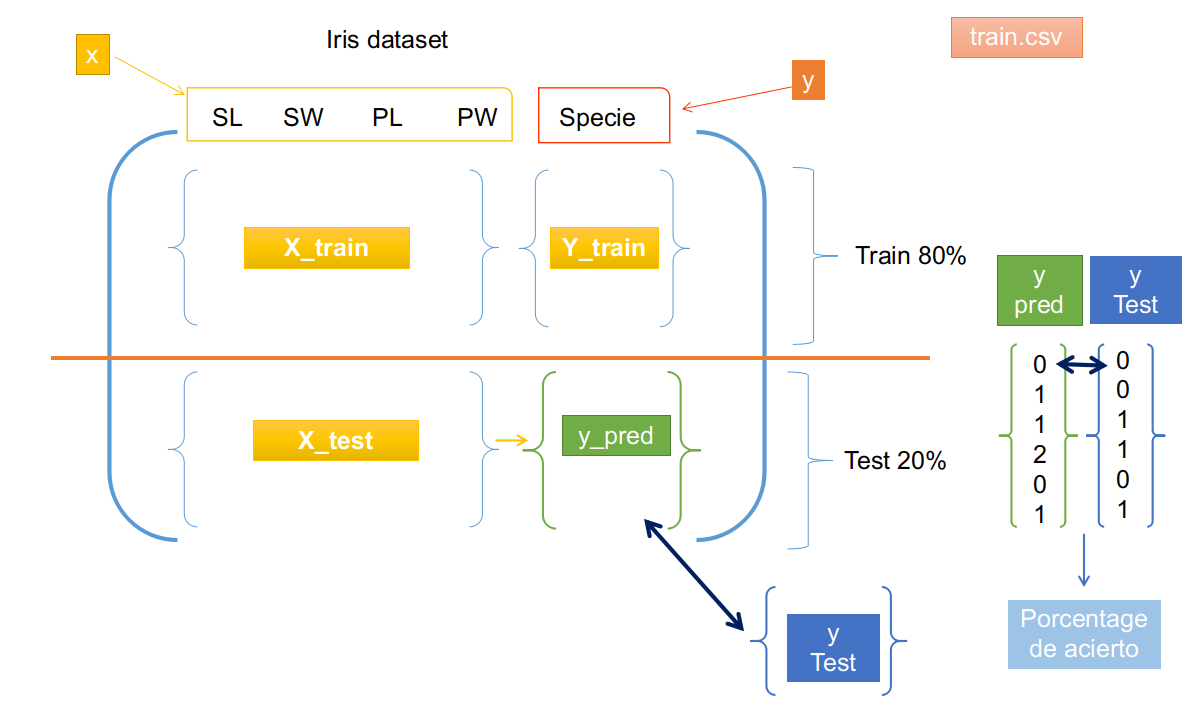

In [42]:
from IPython import display

display.Image("train.png")

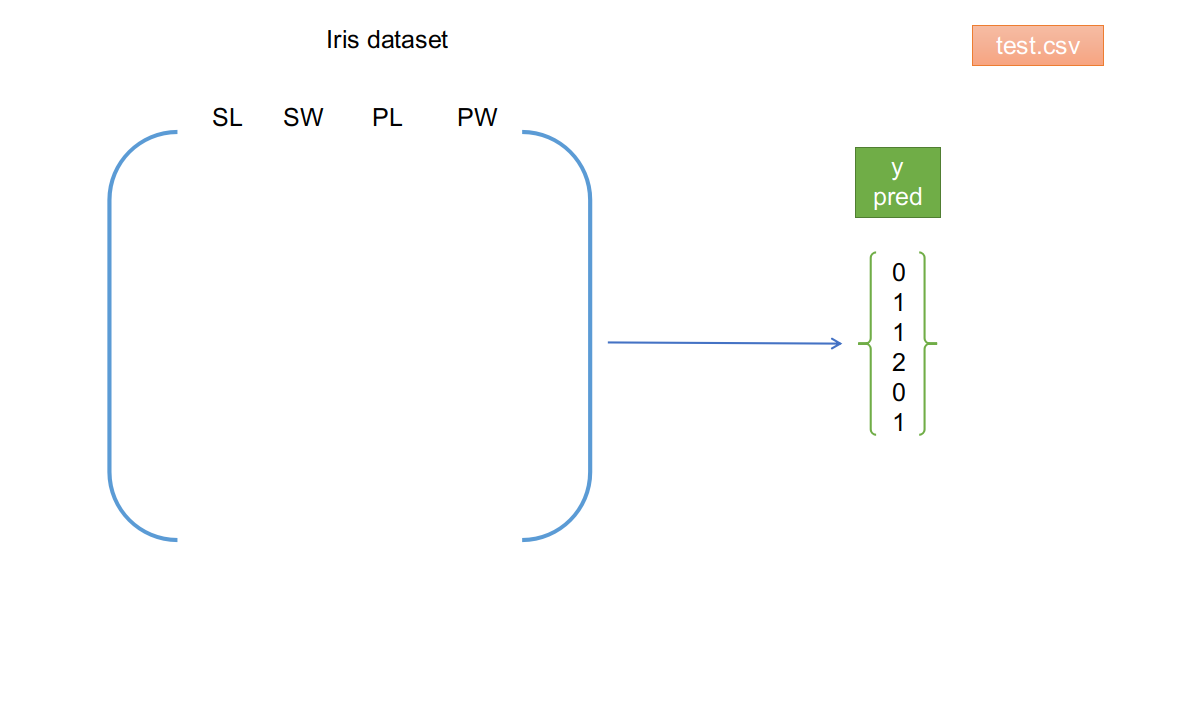

In [43]:
display.Image("test.png")

En la ciencia de datos o el aprendizaje automático, la división de datos entra en escena cuando los datos dados se dividen en dos o más subconjuntos para que un modelo pueda entrenarse, probarse y evaluarse.

En la práctica o en proyectos de la vida real, la división de datos es un aspecto importante y se vuelve imprescindible cuando los modelos se basan en los datos, ya que garantiza la creación de modelos de aprendizaje automático. Por lo general, creamos dos o tres partes del conjunto de datos principal.

Si hay dos divisiones, significa que una se utilizará para el entrenamiento y otra para las pruebas, o
si hay tres divisiones, significa que hay conjuntos de entrenamiento, prueba y validación.

Al realizar tareas de aprendizaje automático supervisado, siempre se recomienda dividir los datos en tres conjuntos: conjunto de entrenamiento, conjunto de prueba y conjunto de validación. Entonces, en el procedimiento cuando se trata de la división de datos, primero, dividimos aleatoriamente los datos en tres conjuntos:

- **Conjunto de entrenamiento:** Un subconjunto del conjunto de datos principal se incorporará al modelo para que este pueda aprender los patrones de datos.
- **Conjunto de validación:** Este conjunto se utiliza para comprender el rendimiento del modelo en comparación con otros modelos y opciones de hiperparámetros.
- **Conjunto de prueba:** Este conjunto verifica la precisión del modelo final.

**Datos de entrenamiento**

Un subconjunto de datos es responsable de entrenar el modelo. Por lo general, el modelo de aprendizaje automático aprende a predecir al comprender los patrones y las relaciones ocultas dentro de los datos. El modelo aprenderá de los patrones y las relaciones entre las variables de peso y tono en nuestro ejemplo.

Al tomar datos de entrenamiento de todos los datos, se debe tener en cuenta una mayor representatividad de los datos. Esto significa que los datos extraídos deben tener suficiente población para cada clase de datos. Con esta calidad, también se debe garantizar que los datos extraídos sean imparciales porque los datos sesgados pueden generar un modelo inexacto.

El ejemplo anterior representa un problema de clasificación de datos en las clases masculina y femenina como una tarea de clasificación binaria. Para resolver este problema, podemos utilizar un modelo de árbol de decisiones simple.

Un árbol de decisiones aprenderá dividiendo los datos en nodos, utilizando la característica seleccionada (Ninguno, Peso, Tono de voz o Peso y Tono de voz).

**Datos de validación**

Al crear un modelo de aprendizaje automático, generalmente intentamos entrenar más de un modelo cambiando los parámetros del modelo o utilizando diferentes algoritmos. Por ejemplo, al crear el modelo de árbol de decisiones para nuestros datos, realizamos un ajuste de hiperparámetros y descubrimos que varios modelos funcionaban bien en esas condiciones. Por lo tanto, debemos elegir un modelo final utilizando diferentes parámetros.

Se ha visto que si usamos los mismos datos para el entrenamiento y el ajuste de un modelo, tr representa un exceso de aptitud y se vuelve incapaz de generalizarse.

Aquí, el conjunto de validación de los datos entra en escena y funciona como datos independientes e imparciales, lo que también ayuda en la comparación del rendimiento de diferentes modelos.

Como estos datos ayudan a elegir el mejor algoritmo o parámetro del modelo, llevamos el modelo a producción después de aproximar el rendimiento del modelo. Se sugiere no utilizar los datos de prueba para evaluar el modelo antes de seleccionar el óptimo.

**Datos de prueba**

Como se discutió en el tema anterior, después de entrenar, validar y seleccionar un modelo, debemos llevarlo a producción después de probar su rendimiento para este subconjunto extraído de datos que se denomina datos de prueba.

Debemos ser muy cuidadosos con este paso porque si se realiza antes de tiempo puede generar un sobreajuste y conducir a un rendimiento poco confiable. El conjunto de prueba debe usarse como la forma final de evaluación cuando se completa el uso del conjunto de validación y se selecciona el modelo final.

**Palabras finales**

Hemos discutido la división de datos en el aprendizaje automático utilizando los puntos "¿Qué es la división de datos?", "¿Cómo funciona?" y "¿Qué son los conjuntos de entrenamiento, prueba y validación?". Podemos obtener las siguientes conclusiones:

- La *división de datos* se convierte en un paso necesario a seguir en el modelado de aprendizaje automático porque ayuda desde el entrenamiento hasta la evaluación del modelo.
- Deberíamos dividir todo nuestro conjunto de datos en tres subconjuntos de datos.
- La cantidad de datos de entrenamiento debería ser mayor que la de los otros dos datos. Además, debería ser imparcial respecto de cualquier clase o categoría, de modo que el modelo pueda aprender adecuadamente de los datos.
- Deberíamos utilizar el conjunto de validación para evaluar varios modelos y encontrar el modelo con mejor rendimiento.
- Después de encontrar el modelo con mejor rendimiento, utilizamos el conjunto de prueba para cuantificar el rendimiento del modelo.
- La división de datos es un subpaso simple en el modelado de aprendizaje automático o el modelado de datos, mediante el cual podemos tener una comprensión realista del rendimiento del modelo. Además, ayuda al modelo a generalizarse bien a datos desconocidos o no vistos.

### Comprender el impacto de la gestión de valores atípicos en la calidad de los datos en el preprocesamiento.(puntos anteriores)

*Creado por:*

*Isabel Maniega*